279 186 403 317
(124, 131)


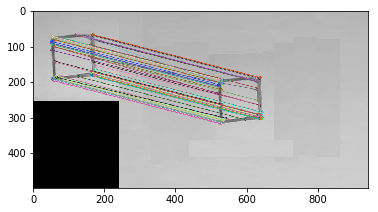

True

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('s.jpg',0)          # queryImage
img2 = cv2.imread('s1.jpg',0) # trainImage

# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)


list_kp1 = []
list_kp2 = []
for mat in matches:
    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    
    (x0,y0) = kp2[img2_idx].pt
    (x3,y3) = kp2[img2_idx].pt
    break
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    
    (x1,y1) = kp1[img1_idx].pt
    (x2,y2) = kp2[img2_idx].pt
    #print(x1,y1)
    if(x2<x0):
        x0 = x2;
    if(y2<y0):
        y0 = y2;
    if(x2>x3):
        x3 = x2;
    if(y2>y3):
        y3 = y2;
   #print("\n data:")
    #print(x2,y2)
    #print(x0,y0)
    #print(x3,y3)
    
    

    
    
    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))
    

list_kp1 = [kp1[mat.queryIdx].pt for mat in matches] 
list_kp2 = [kp2[mat.trainIdx].pt for mat in matches]


print(int(x0), int(y0),  int(x3),int(y3))
img4 = cv2.imread('s1.jpg',0)
cropped = img4[int(x0):int(x3), int(y0):int(y3)]
print(cropped.shape)
cv2.imwrite("cropped.jpg", cropped)
cv2.waitKey(0)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:],None, flags=2)

plt.imshow(img3),plt.show()

cv2.imwrite("cropped.jpg", img3)